# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
150481               2020-07-12           2020-07-12            2020-07-06   
150482               2020-07-12           2020-07-12            2020-07-09   
150483               2020-07-12           2020-07-12            2020-07-06   
150484               2020-07-12           2020-07-12            2020-07-06   
150485               2020-07-12           2020-07-12            2020-07-09   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
150481             2020-06-22 00:00:00                   NaT   
150482             2020-06-30 00:00:00                   NaT   
150483             2020-07-06 00:00:00                   NaT   
150484             2020-07-06 00:00:00                   NaT   
150485             2020-06-30 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
150481                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
150482                    NaT              Pereira        Risaralda  Moderado   
150483                    NaT              Pereira        Risaralda      Leve   
150484                    NaT              Pereira        Risaralda      Leve   
150485                    NaT              Pereira        Risaralda  Moderado   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
150481            Casa  ...               20 - 30    M               NaN   
150482        Hospital  ...               20 - 30    F               NaN   
150483            Casa  ...               10 - 20    F               NaN   
150484            Casa  ...               10 - 20    F               NaN   
150485        Hospital  ...               40 - 50    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1014.0   1404.0
Antioquia                                            3852.0   5401.0
Arauca                                                 18.0    123.0
Archipiélago de San Andrés Providencia y Santa ...      8.0     21.0
Atlántico                                            6888.0   8064.0
Barranquilla D.E.                                    8522.0  10226.0
Bogotá D.C.                                         24745.0  24899.0
Bolívar                                               590.0    759.0
Boyacá                                                243.0    249.0
Buenaventura D.E.                                     646.0   1066.0
Caldas                                                172.0    131.0
Caquetá                                                52.0     60.0
Cartagena D.T. y C.                                  4836.0   6021.0
Casanare                                               40.0     78.0
Cauca                                                 331.0    440.0
Cesar                                                 699.0    806.0
Chocó                                                 985.0   1212.0
Cundinamarca                                         2131.0   2066.0
Córdoba                                               784.0    811.0
Guainía                                                 6.0      8.0
Guaviare                                                5.0     37.0
Huila                                                 213.0    211.0
La Guajira                                            415.0    513.0
Magdalena                                             568.0    620.0
Meta                                                  299.0   1299.0
Nariño                                               2093.0   2442.0
Norte de Santander                                    267.0    332.0
Putumayo                                               39.0     56.0
Quindío                                               108.0     87.0
Risaralda                                             394.0    351.0
Santa Marta D.T. y C.                                 795.0    832.0
Santander                                             475.0    854.0
Sucre                                                1169.0   1354.0
Tolima                                                417.0   1053.0
Valle del Cauca                                      5807.0   6903.0
Vaupés                                                 10.0     19.0
Vichada                                                 0.0      1.0

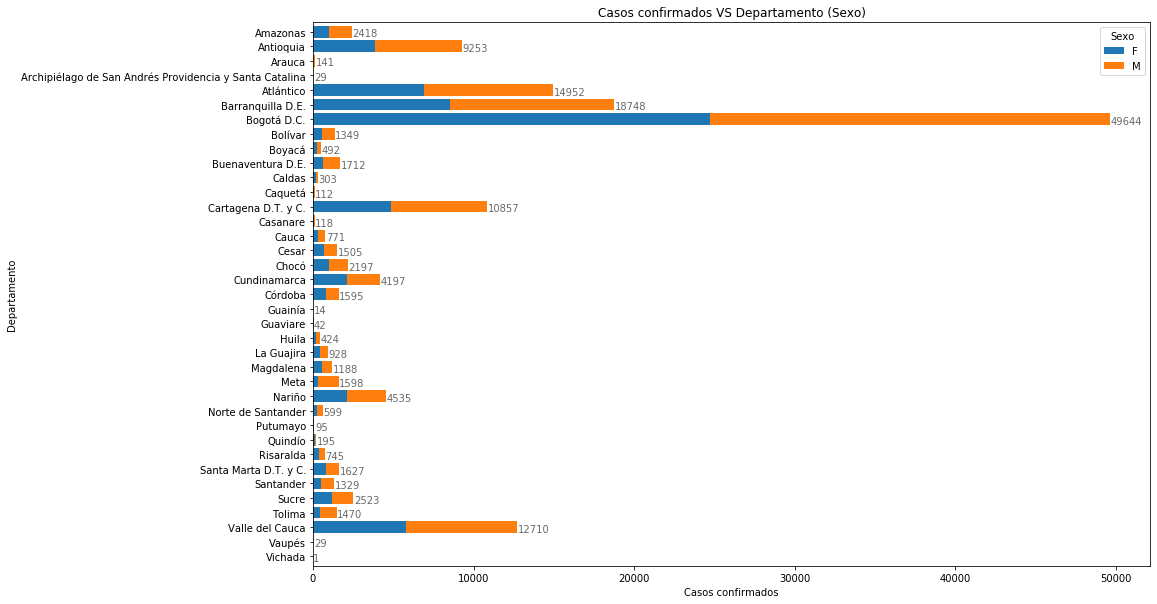

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               124      434      497   
Antioquia                                              338      778     2509   
Arauca                                                   2       33       59   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              626     1065     3306   
Barranquilla D.E.                                      630     1098     4112   
Bogotá D.C.                                           2467     4080    11400   
Bolívar                                                 62      128      302   
Boyacá                                                  29       46       96   
Buenaventura D.E.                                       34      244      387   
Caldas                                                  11       19       65   
Caquetá                                                  2        6       39   
Cartagena D.T. y C.                                    416      740     2517   
Casanare                                                 6        6       31   
Cauca                                                   40       64      161   
Cesar                                                  145      177      334   
Chocó                                                   94      190      526   
Cundinamarca                                           227      328      969   
Córdoba                                                 71       86      317   
Guainía                                                  0        2        4   
Guaviare                                                 0       16        9   
Huila                                                   25       40       73   
La Guajira                                              38      100      230   
Magdalena                                               69       93      208   
Meta                                                    18      112      536   
Nariño                                                 237      417     1066   
Norte de Santander                                      32       28      137   
Putumayo                                                 2        8       15   
Quindío                                                  8       12       30   
Risaralda                                               47       74      159   
Santa Marta D.T. y C.                                   70      110      334   
Santander                                               42      136      352   
Sucre                                                   95      196      570   
Tolima                                                  46       81      518   
Valle del Cauca                                        440      914     2891   
Vaupés                                                   0        3       11   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                466      326      263   
Antioquia                                              2369     1359     1049   
Arauca                                                   35        7        3   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              3544     2343     1971   
Barranquilla D.E.                                      4475     2917     2516   
Bogotá D.C.                                           10664     7859     6598   
Bolívar                                                 336      190      120   
Boyacá                                                   93       75 

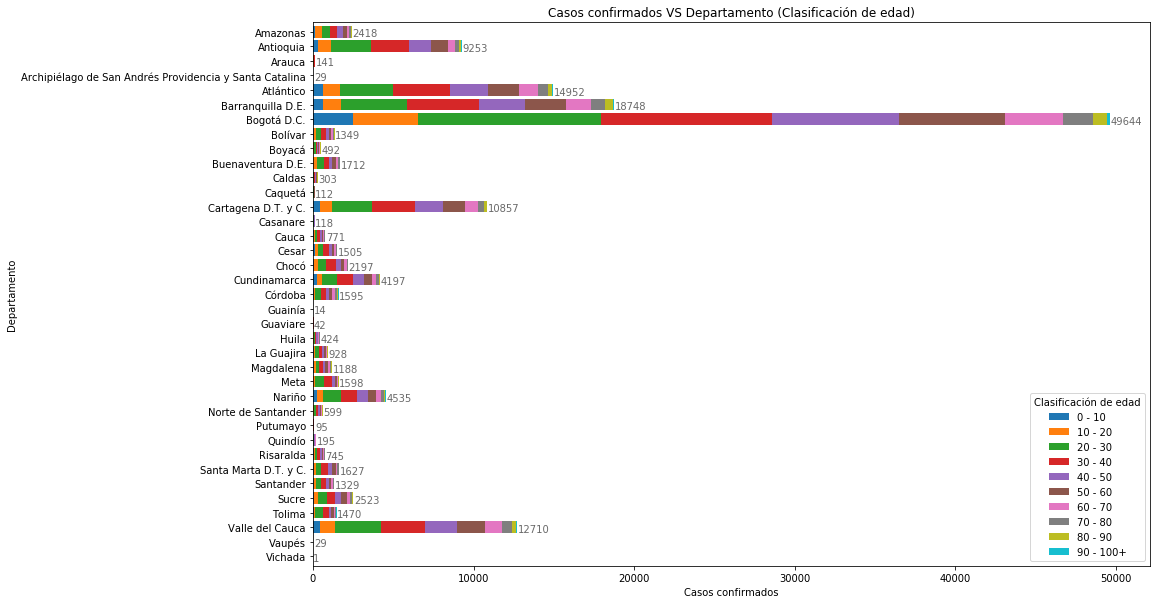

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              113.0      100.0   
Antioquia                                            5764.0       92.0   
Arauca                                                113.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      7.0        0.0   
Atlántico                                            7267.0      746.0   
Barranquilla D.E.                                    8408.0     1122.0   
Bogotá D.C.                                         27729.0     1123.0   
Bolívar                                               588.0       61.0   
Boyacá                                                160.0       14.0   
Buenaventura D.E.                                     376.0      113.0   
Caldas                                                 61.0        7.0   
Caquetá                                                70.0        2.0   
Cartagena D.T. y C.                                  3929.0      386.0   
Casanare                                               56.0        1.0   
Cauca                                                 422.0       28.0   
Cesar                                                 527.0       34.0   
Chocó                                                 947.0       71.0   
Cundinamarca                                         1774.0       95.0   
Córdoba                                               751.0      172.0   
Guainía                                                 2.0        1.0   
Guaviare                                                6.0        0.0   
Huila                                                  79.0       13.0   
La Guajira                                            625.0       51.0   
Magdalena                                             452.0      128.0   
Meta                                                  470.0       17.0   
Nariño                                               1415.0      140.0   
Norte de Santander                                    303.0       26.0   
Putumayo                                               44.0        9.0   
Quindío                                                47.0        5.0   
Risaralda                                             317.0       20.0   
Santa Marta D.T. y C.                                 865.0       75.0   
Santander                                             824.0       25.0   
Sucre                                                1572.0      155.0   
Tolima                                                863.0       27.0   
Valle del Cauca                                      5526.0      447.0   
Vaupés                                                  7.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              454.0          53.0   
Arauca                                                   1.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              599.0          94.0   
Barranquilla D.E.                                      842.0         111.0   
Bogotá D.C.                                           2698.0         150.0   
Bolívar                                                 78.0          10.0   
Boyacá                                                  33.0           2.0   
Buenaventura D.E.                                      111.0          20.0   
Caldas                                                  12.0           1.0   
Caquetá                                                 14.0           2.0   
Cartagena D.T. y C.  

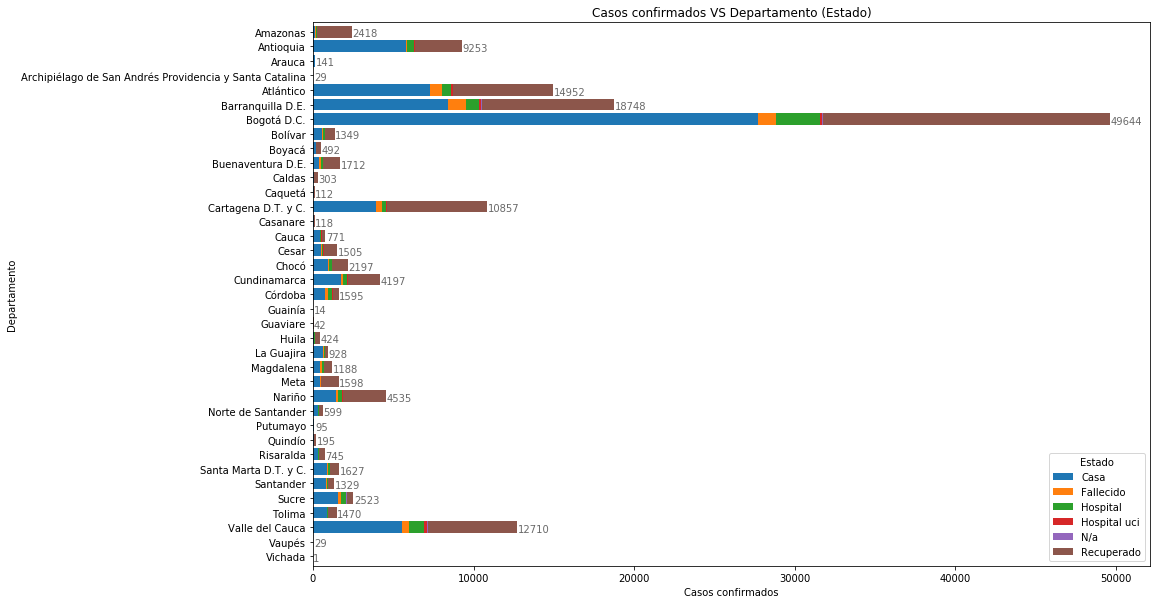

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          34228  38251
Fallecido      2016   3291
Hospital       3393   4540
Hospital uci    339    609
N/a             139    188
Recuperado    29521  33930

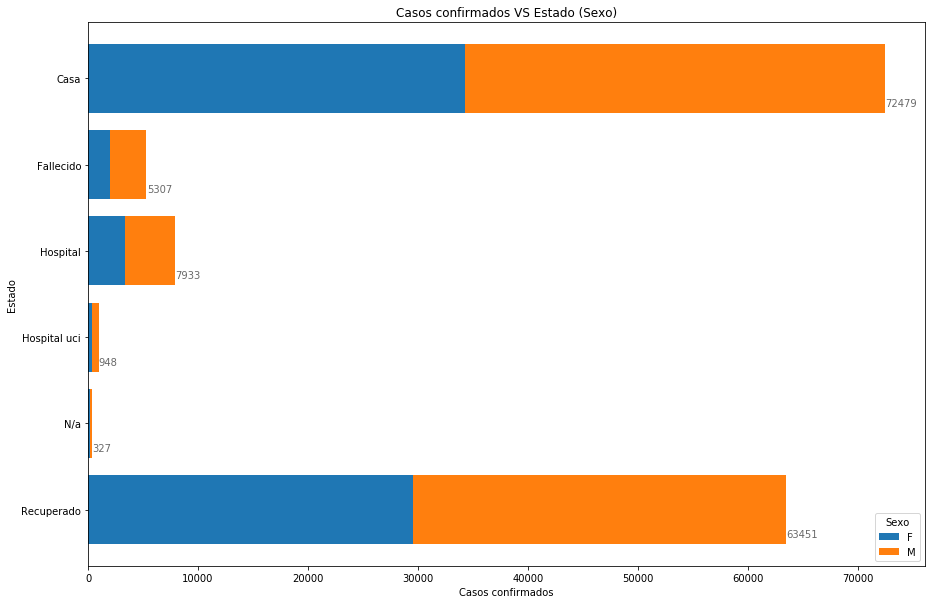

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3044     5706    18524    18079    11421     8762   
Fallecido                  12       12       76      196      439      816   
Hospital                  288      190      669     1063     1241     1615   
Hospital uci               45       22       38      104      136      207   
N/a                         7        7       13       15       23       39   
Recuperado               3097     5929    15458    14788     9887     7632   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      4279     1800      738        126  
Fallecido                 1254     1316      952        234  
Hospital                  1389      940      467         71  
Hospital uci               214      133       44          5  
N/a                         71       72       62         18  
Recuperado                4001     1850      701        108

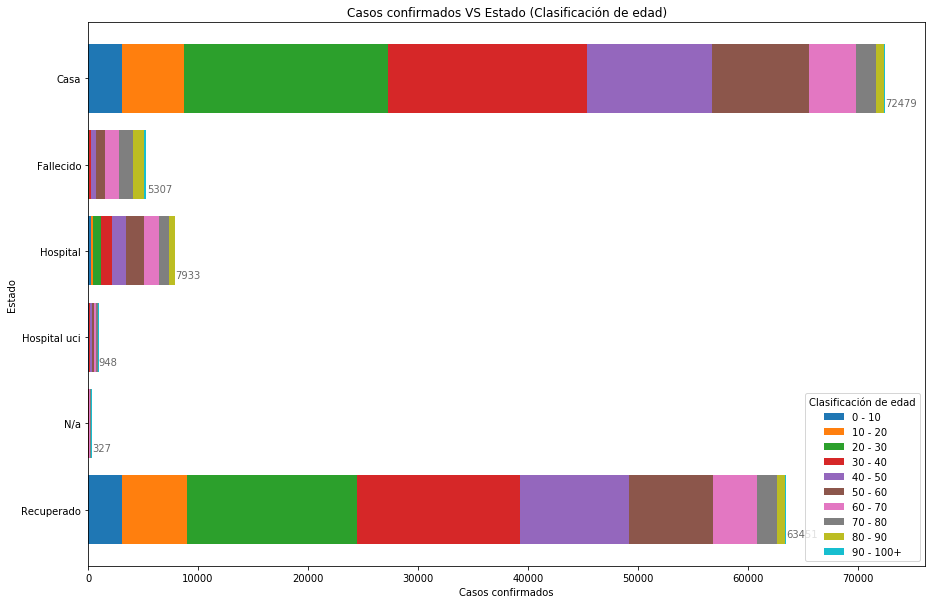

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   63923  69710
Importado      450    513
Relacionado   5263  10586

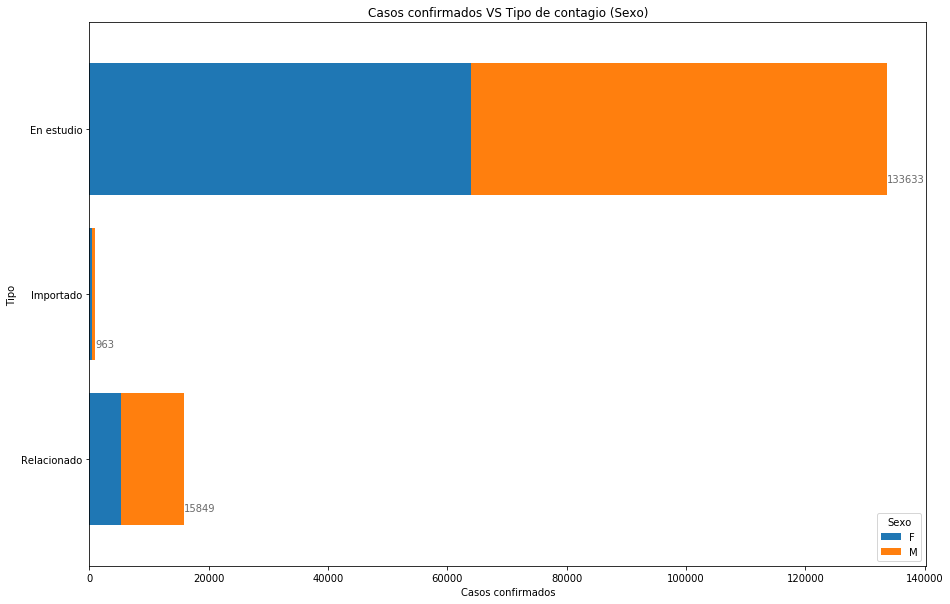

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               5684     9736    30154    30316    20939    17427   
Importado                   5       34      238      226      171      149   
Relacionado               804     2096     4386     3703     2037     1495   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               10358     5720     2779        520  
Importado                   95       35        9          1  
Relacionado                755      356      176         41

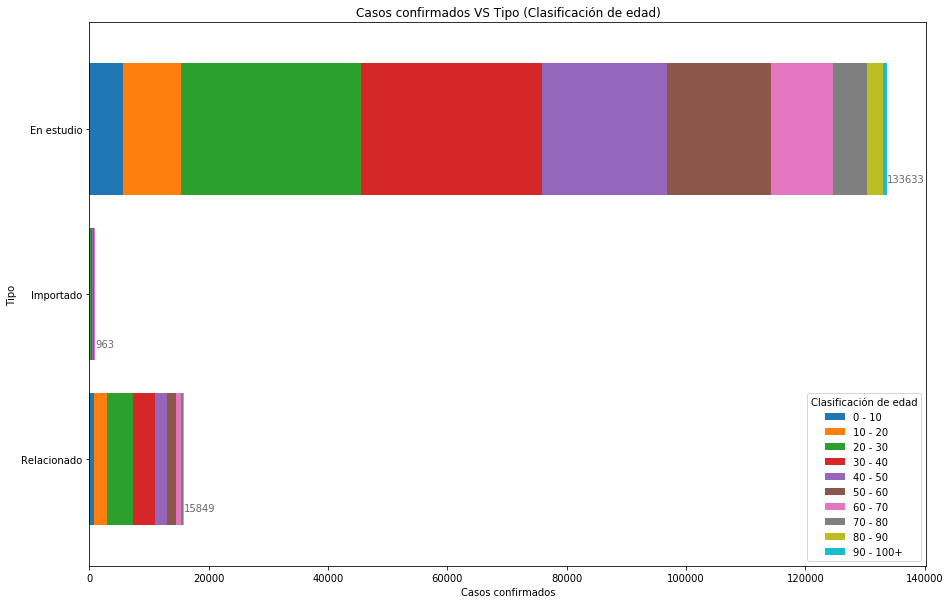

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3296   3197
10 - 20                 5351   6515
20 - 30                16149  18629
30 - 40                15575  18670
40 - 50                10744  12403
50 - 60                 8790  10281
60 - 70                 5174   6034
70 - 80                 2766   3345
80 - 90                 1472   1492
90 - 100+                319    243

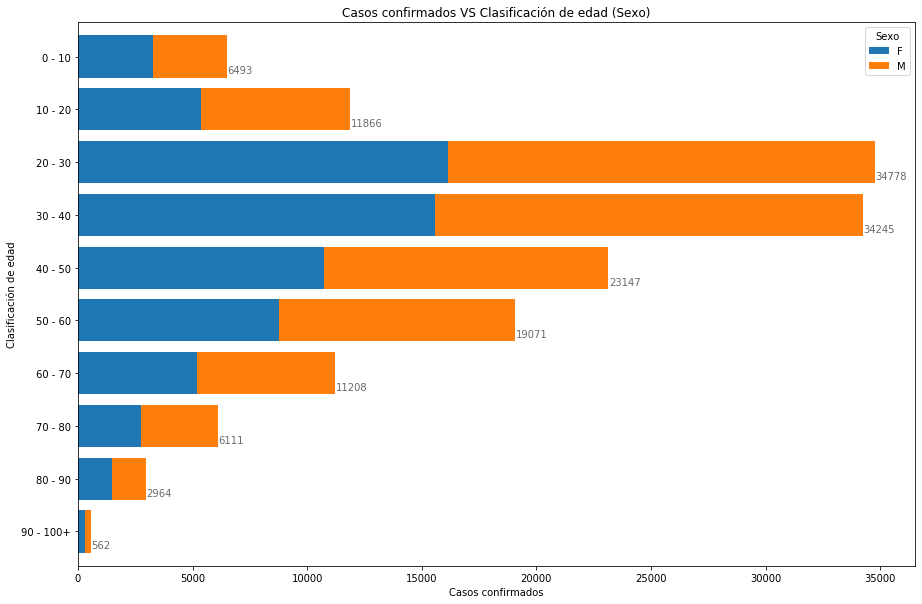

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3044         12       288            45    7   
10 - 20                 5706         12       190            22    7   
20 - 30                18524         76       669            38   13   
30 - 40                18079        196      1063           104   15   
40 - 50                11421        439      1241           136   23   
50 - 60                 8762        816      1615           207   39   
60 - 70                 4279       1254      1389           214   71   
70 - 80                 1800       1316       940           133   72   
80 - 90                  738        952       467            44   62   
90 - 100+                126        234        71             5   18   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       3097  
10 - 20                      5929  
20 - 30                     15458  
30 - 40                     14788  
40 - 50                      9887  
50 - 60                      7632  
60 - 70                      4001  
70 - 80                      1850  
80 - 90                       701  
90 - 100+                     108

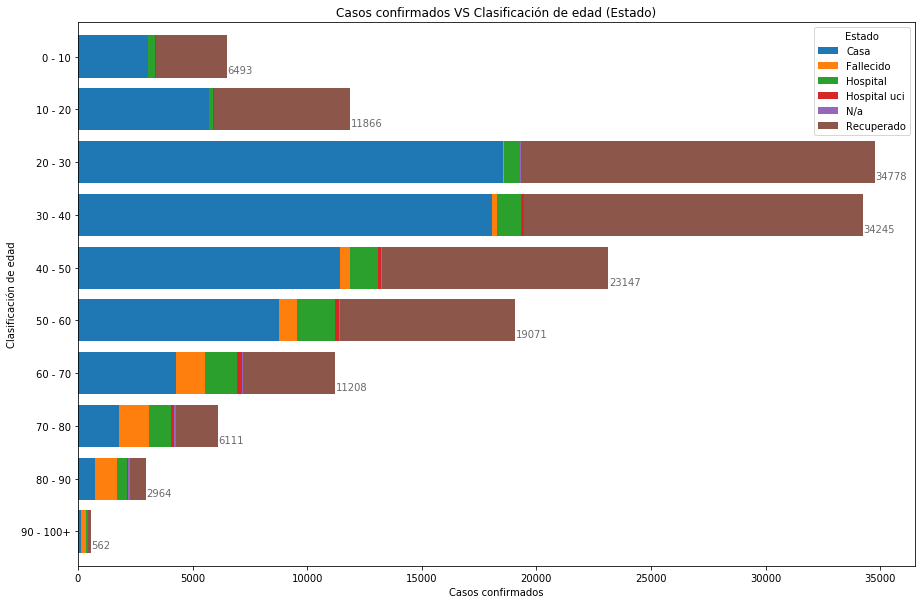

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-08            1871.0  2053.0
2020-07-09            2337.0  2763.0
2020-07-10            2894.0  3479.0
2020-07-11            2437.0  2729.0
2020-07-12            2050.0  2152.0

[126 rows x 2 columns]

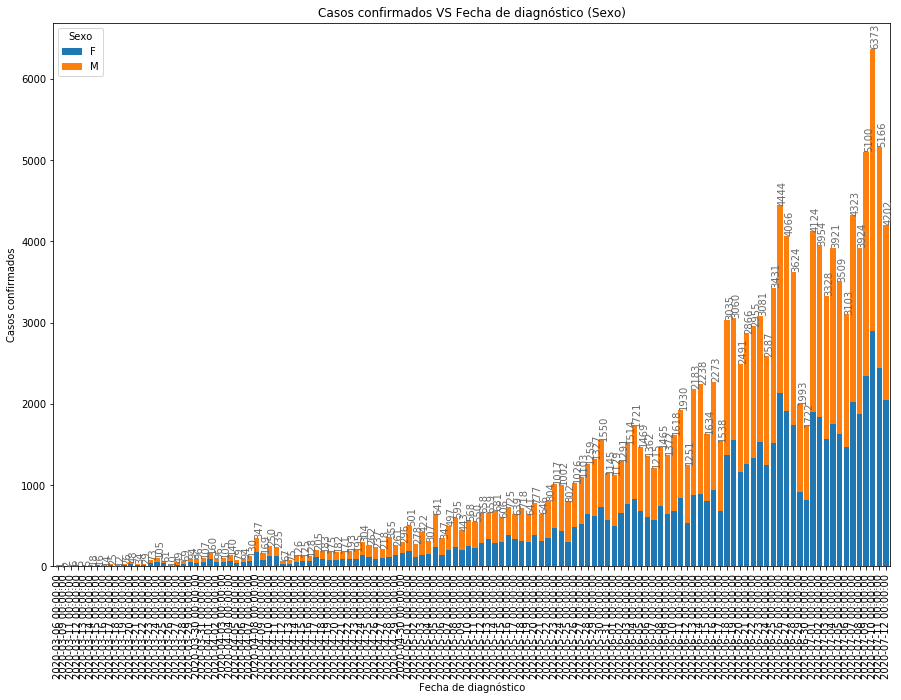

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-08                159      249      883      917      636      525   
2020-07-09                176      348     1194     1223      784      644   
2020-07-10                215      441     1546     1563      981      828   
2020-07-11                182      354     1228     1216      829      674   
2020-07-12                166      309      950      955      693      574   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-08                 302      156       84         13  
2020-07-09                 394      206      108         23  
2020-07-10                 428      247      101         23  
2020-07-11                 383      187      101         12  
2020-07-12                 314      157       71         13  

[126 rows x 10 columns]

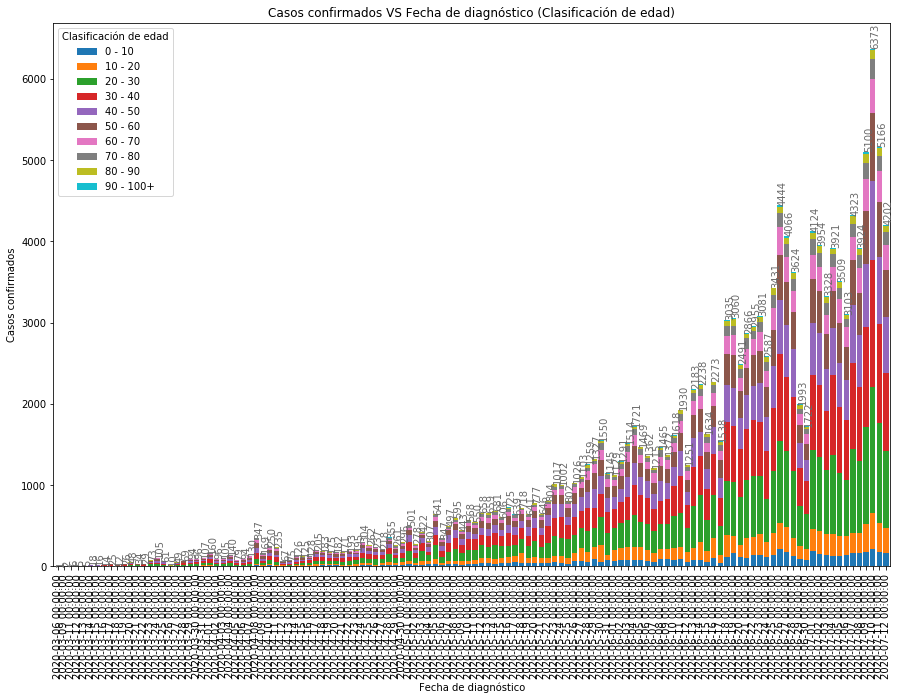

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-08            3480.0      108.0     296.0          26.0  5.0   
2020-07-09            4486.0      152.0     420.0          29.0  3.0   
2020-07-10            5935.0       76.0     330.0          21.0  4.0   
2020-07-11            4621.0       88.0     358.0          24.0  3.0   
2020-07-12            3802.0        5.0     367.0          28.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-08                   9.0  
2020-07-09                  10.0  
2020-07-10                   7.0  
2020-07-11                  72.0  
2020-07-12                   0.0  

[126 rows x 6 columns]

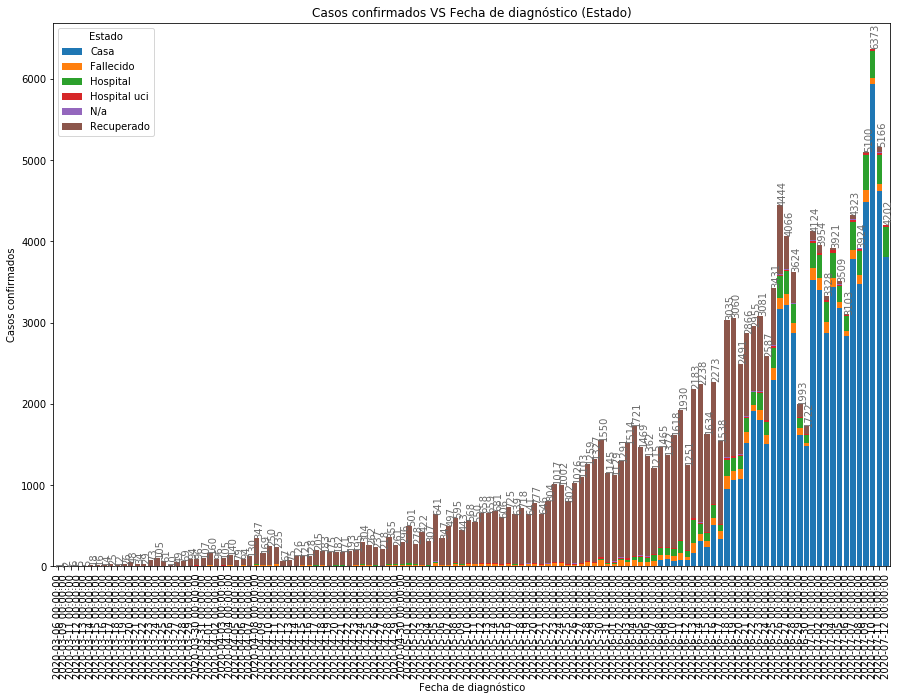

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-08            58300.0  67846.0
2020-07-09            60637.0  70609.0
2020-07-10            63531.0  74088.0
2020-07-11            65968.0  76817.0
2020-07-12            68018.0  78969.0

[126 rows x 2 columns]

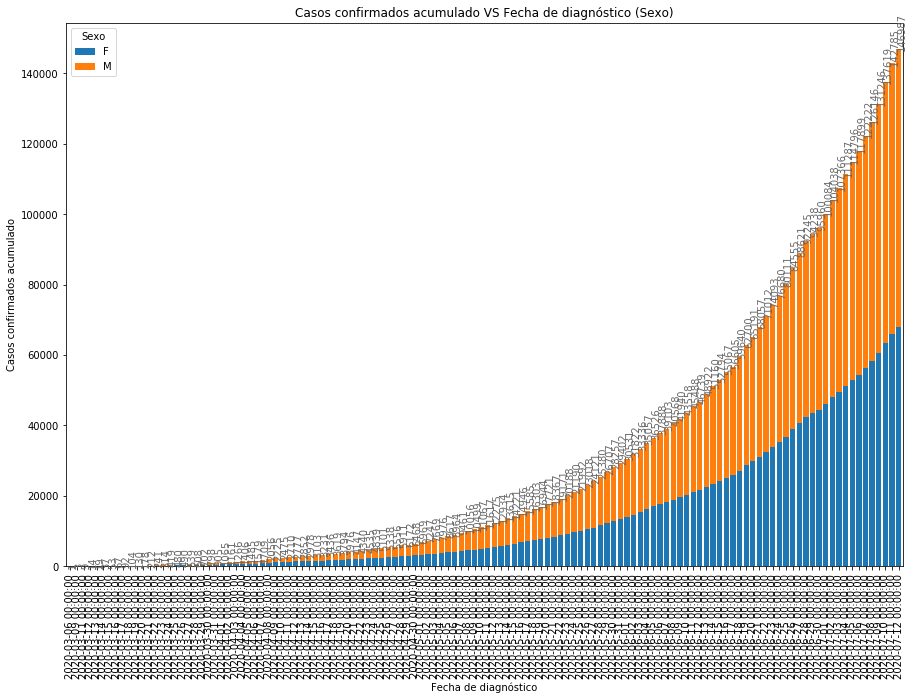

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-08               5630    10163    29048    28445    19349    15934   
2020-07-09               5806    10511    30242    29668    20133    16578   
2020-07-10               6021    10952    31788    31231    21114    17406   
2020-07-11               6203    11306    33016    32447    21943    18080   
2020-07-12               6369    11615    33966    33402    22636    18654   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-08                9426     5165     2504        482  
2020-07-09                9820     5371     2612        505  
2020-07-10               10248     5618     2713        528  
2020-07-11               10631     5805     2814        540  
2020-07-12               10945     5962     2885        553  

[126 rows x 10 columns]

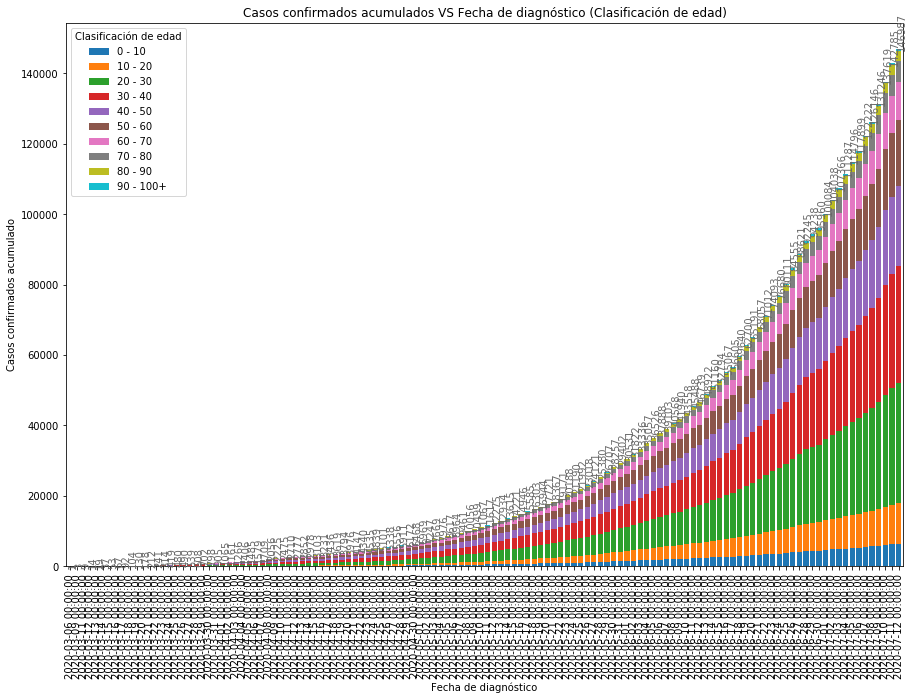

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-08            52909.0     4845.0    6315.0         810.0  304.0   
2020-07-09            57395.0     4997.0    6735.0         839.0  307.0   
2020-07-10            63330.0     5073.0    7065.0         860.0  311.0   
2020-07-11            67951.0     5161.0    7423.0         884.0  314.0   
2020-07-12            71753.0     5166.0    7790.0         912.0  314.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-08               60963.0  
2020-07-09               60973.0  
2020-07-10               60980.0  
2020-07-11               61052.0  
2020-07-12               61052.0  

[126 rows x 6 columns]

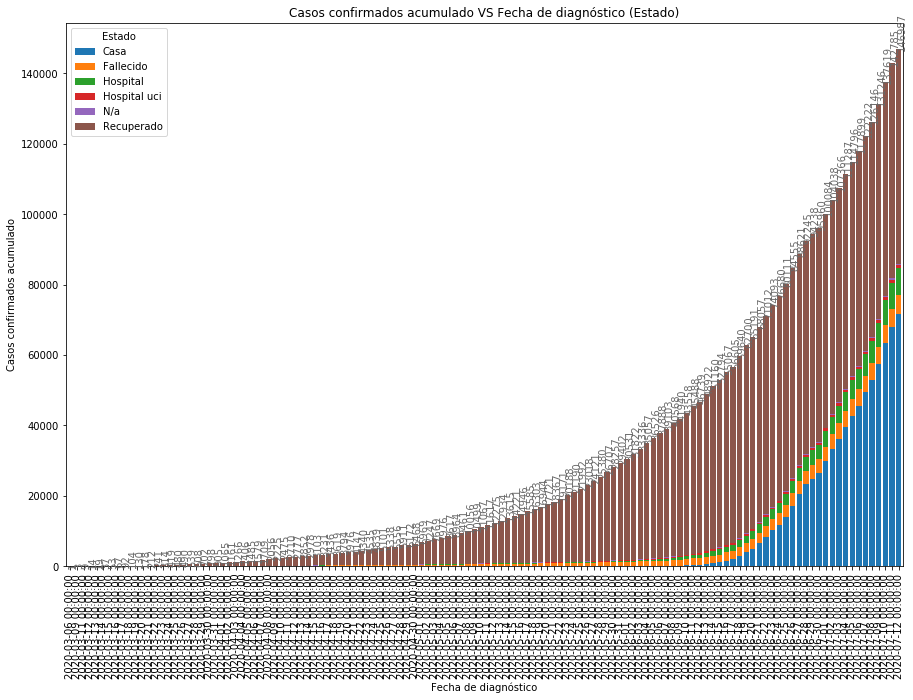

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>